In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
import tensorflow as tf 
from tensorflow.keras.layers import Dense
import keras_tuner as kf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [3]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [6]:
df.drop(columns=['month','day'],inplace=True)

In [7]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

# Visualization

C:\Users\kitan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size_category', ylabel='count'>

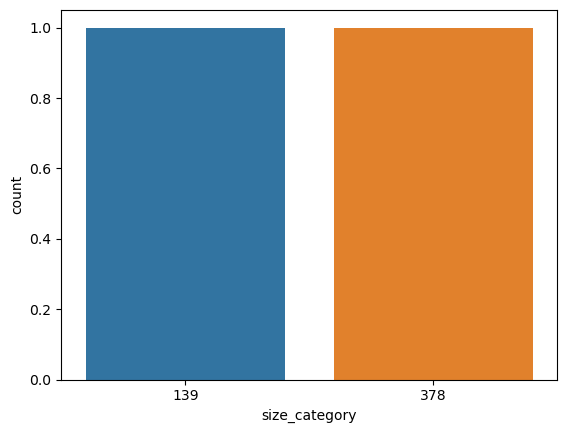

In [8]:
sns.countplot(df['size_category'].value_counts())

# Transformation

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le=LabelEncoder()
y=le.fit_transform(df['size_category'])

In [11]:
x=df.iloc[:,:-1]

In [12]:
sc=StandardScaler()
x=sc.fit_transform(x)

In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=2)

# Model Building

In [15]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [16]:
ann=Sequential()

ann.add(Dense(units=10,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=350,callbacks=[early])

Epoch 1/350
13/13 [==============================] - 2s 36ms/step - loss: 0.7567 - val_loss: 0.7423
Epoch 2/350
13/13 [==============================] - 0s 8ms/step - loss: 0.7329 - val_loss: 0.7238
Epoch 3/350
13/13 [==============================] - 0s 8ms/step - loss: 0.7135 - val_loss: 0.7089
Epoch 4/350
13/13 [==============================] - 0s 7ms/step - loss: 0.6979 - val_loss: 0.6956
Epoch 5/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6830 - val_loss: 0.6860
Epoch 6/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6709 - val_loss: 0.6777
Epoch 7/350
13/13 [==============================] - 0s 7ms/step - loss: 0.6604 - val_loss: 0.6703
Epoch 8/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6514 - val_loss: 0.6638
Epoch 9/350
13/13 [==============================] - 0s 8ms/step - loss: 0.6409 - val_loss: 0.6593
Epoch 10/350
13/13 [==============================] - 0s 7ms/step - loss: 0.6341 - val_loss: 0.6548
Epoch 11

13/13 [==============================] - 0s 8ms/step - loss: 0.4386 - val_loss: 0.5884
Epoch 84/350
13/13 [==============================] - 0s 8ms/step - loss: 0.4369 - val_loss: 0.5874
Epoch 85/350
13/13 [==============================] - 0s 7ms/step - loss: 0.4347 - val_loss: 0.5833
Epoch 86/350
13/13 [==============================] - 0s 8ms/step - loss: 0.4334 - val_loss: 0.5808
Epoch 87/350
13/13 [==============================] - 0s 8ms/step - loss: 0.4312 - val_loss: 0.5807
Epoch 88/350
13/13 [==============================] - 0s 8ms/step - loss: 0.4294 - val_loss: 0.5810
Epoch 89/350
13/13 [==============================] - 0s 8ms/step - loss: 0.4275 - val_loss: 0.5820
Epoch 90/350
13/13 [==============================] - 0s 8ms/step - loss: 0.4260 - val_loss: 0.5831
Epoch 91/350
13/13 [==============================] - 0s 7ms/step - loss: 0.4237 - val_loss: 0.5832
Epoch 92/350
13/13 [==============================] - 0s 8ms/step - loss: 0.4216 - val_loss: 0.5833
Epoch 93/350


13/13 [==============================] - 0s 8ms/step - loss: 0.2954 - val_loss: 0.5177
Epoch 165/350
13/13 [==============================] - 0s 7ms/step - loss: 0.2940 - val_loss: 0.5152
Epoch 166/350
13/13 [==============================] - 0s 7ms/step - loss: 0.2922 - val_loss: 0.5121
Epoch 167/350
13/13 [==============================] - 0s 8ms/step - loss: 0.2913 - val_loss: 0.5119
Epoch 168/350
13/13 [==============================] - 0s 7ms/step - loss: 0.2891 - val_loss: 0.5121
Epoch 169/350
13/13 [==============================] - 0s 9ms/step - loss: 0.2876 - val_loss: 0.5143
Epoch 170/350
13/13 [==============================] - 0s 7ms/step - loss: 0.2867 - val_loss: 0.5104
Epoch 171/350
13/13 [==============================] - 0s 8ms/step - loss: 0.2856 - val_loss: 0.5088
Epoch 172/350
13/13 [==============================] - 0s 8ms/step - loss: 0.2839 - val_loss: 0.5081
Epoch 173/350
13/13 [==============================] - 0s 8ms/step - loss: 0.2819 - val_loss: 0.5073
Epoc

13/13 [==============================] - 0s 8ms/step - loss: 0.1862 - val_loss: 0.4525
Epoch 246/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1850 - val_loss: 0.4504
Epoch 247/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1841 - val_loss: 0.4528
Epoch 248/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1830 - val_loss: 0.4528
Epoch 249/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1817 - val_loss: 0.4516
Epoch 250/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1809 - val_loss: 0.4513
Epoch 251/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1801 - val_loss: 0.4522
Epoch 252/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1791 - val_loss: 0.4521
Epoch 253/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1778 - val_loss: 0.4508
Epoch 254/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1771 - val_loss: 0.4457
Epoc

13/13 [==============================] - 0s 7ms/step - loss: 0.1204 - val_loss: 0.4157
Epoch 327/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1202 - val_loss: 0.4191
Epoch 328/350
13/13 [==============================] - 0s 11ms/step - loss: 0.1199 - val_loss: 0.4197
Epoch 329/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1197 - val_loss: 0.4157
Epoch 330/350
13/13 [==============================] - 0s 7ms/step - loss: 0.1192 - val_loss: 0.4140
Epoch 331/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1180 - val_loss: 0.4155
Epoch 332/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1174 - val_loss: 0.4148
Epoch 333/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1164 - val_loss: 0.4129
Epoch 334/350
13/13 [==============================] - 0s 9ms/step - loss: 0.1158 - val_loss: 0.4115
Epoch 335/350
13/13 [==============================] - 0s 8ms/step - loss: 0.1151 - val_loss: 0.4120
Epo

<AxesSubplot:>

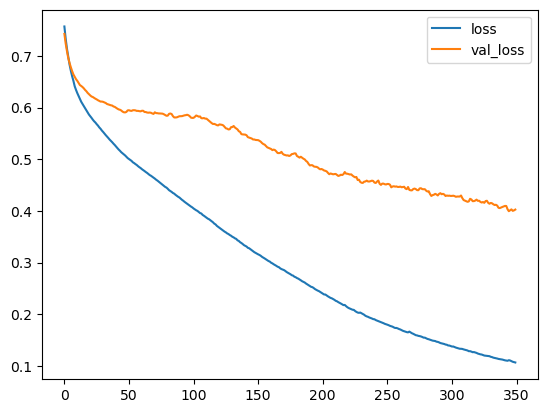

In [17]:
loss = pd.DataFrame(ann.history.history)
loss.plot()

In [18]:
ypred=ann.predict(xtest)

5/5 [==============================] - 0s 4ms/step


In [19]:
ypred=ypred>0.5

In [20]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.87      0.56      0.68        36
           1       0.85      0.97      0.91        94

    accuracy                           0.85       130
   macro avg       0.86      0.76      0.79       130
weighted avg       0.86      0.85      0.84       130



# Hyperparametertunning

In [21]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1,max_value=10)):
        if counter ==0:
            model.add(Dense(hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
                            activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid']),
                            input_dim = 28))
    else:
        model.add(Dense(
              hp.Int('units'+str(i),min_value=8,max_value=128,step=8),
              activation = hp.Choice('activation'+str(i),values = ['relu','tanh','sigmoid'])))
    counter+=1
    model.add(Dense(units = 1,activation='sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd']),
                loss = 'binary_crossentropy',metrics = 'accuracy')
    return model

In [22]:
tunner=kf.RandomSearch(hyper,objective='val_accuracy',max_trials=3)

In [23]:
tunner.search(xtrain,ytrain,epochs=5,validation_data=(xtest,ytest))

Trial 3 Complete [00h 00m 03s]
val_accuracy: 0.7230769395828247

Best val_accuracy So Far: 0.7230769395828247
Total elapsed time: 00h 00m 11s
INFO:tensorflow:Oracle triggered exit


In [24]:
tunner.get_best_hyperparameters()[0].values

{'num_layers': 4,
 'units0': 120,
 'activation0': 'tanh',
 'optimizer': 'sgd',
 'units1': 8,
 'activation1': 'relu',
 'units2': 8,
 'activation2': 'relu',
 'units3': 8,
 'activation3': 'relu'}

In [25]:
x.shape

(517, 28)

In [26]:
model = tunner.get_best_models(num_models=1)[0]
model.build(x.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 120)               3480      
                                                                 
 dense_1 (Dense)             (None, 8)                 968       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainabl

In [27]:
model.fit(xtrain,ytrain,epochs = 100)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.6637 - accuracy: 0.7339
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.7339
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6331 - accuracy: 0.7339
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6206 - accuracy: 0.7339
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6122 - accuracy: 0.7339
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 0.6045 - accuracy: 0.7339
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.7339
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.5969 - accuracy: 0.7339
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5932 - accuracy: 0.7339
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7339
Epoch 11/

13/13 [==============================] - 0s 3ms/step - loss: 0.5229 - accuracy: 0.7339
Epoch 84/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5210 - accuracy: 0.7339
Epoch 85/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5195 - accuracy: 0.7339
Epoch 86/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5181 - accuracy: 0.7339
Epoch 87/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5163 - accuracy: 0.7339
Epoch 88/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.7339
Epoch 89/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.7339
Epoch 90/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5119 - accuracy: 0.7339
Epoch 91/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5105 - accuracy: 0.7339
Epoch 92/100
13/13 [==============================] - 0s 3ms/step - loss: 0.5087 - accuracy: 0.7339
Epoch 93/100


In [28]:
model.evaluate(xtest,ytest)

5/5 [==============================] - 0s 6ms/step - loss: 0.5505 - accuracy: 0.7231


[0.5504531264305115, 0.7230769395828247]

In [29]:
ypred=model.predict(xtest)
ypred

5/5 [==============================] - 0s 5ms/step


array([[0.7620788 ],
       [0.7388322 ],
       [0.747413  ],
       [0.7214393 ],
       [0.9018295 ],
       [0.84658223],
       [0.75082594],
       [0.85488147],
       [0.79195255],
       [0.7293043 ],
       [0.7676804 ],
       [0.87333494],
       [0.5935777 ],
       [0.7572085 ],
       [0.69881   ],
       [0.8062336 ],
       [0.76711196],
       [0.8168085 ],
       [0.7825956 ],
       [0.6891238 ],
       [0.6985911 ],
       [0.76752365],
       [0.7931099 ],
       [0.73871773],
       [0.84595543],
       [0.8360302 ],
       [0.854037  ],
       [0.8308716 ],
       [0.7017566 ],
       [0.7703599 ],
       [0.815625  ],
       [0.7845634 ],
       [0.826262  ],
       [0.76730764],
       [0.8464619 ],
       [0.6994909 ],
       [0.7531822 ],
       [0.7766745 ],
       [0.7676804 ],
       [0.63970363],
       [0.77317774],
       [0.70175844],
       [0.80201536],
       [0.78101236],
       [0.83681184],
       [0.73335534],
       [0.71364546],
       [0.785

In [30]:
ypred=ypred>0.5
ypred=pd.DataFrame(ypred)

In [31]:
ypred=ypred.replace({True:'Small',False:'Large'})
ypred

,0
0,Small
1,Small
2,Small
3,Small
4,Small
...,...
125,Small
126,Small
127,Small
128,Small


C:\Users\kitan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

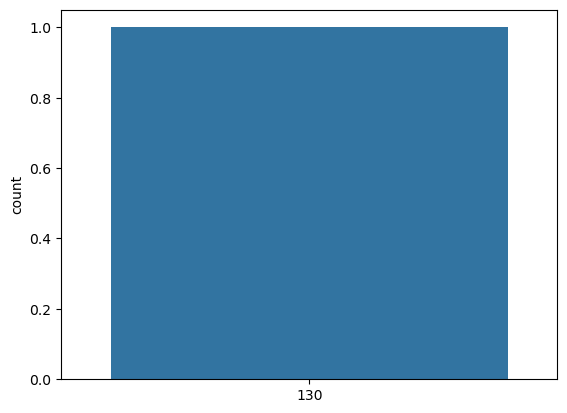

In [37]:
sns.countplot(ypred.value_counts())